# First wave analysis

In [1]:
#hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline
from datetime import date
import datetime

In [2]:
#hide_input
headings= """
<!-- #######  HTML!! #########-->
<h1 style="color: #ff3933; text-align: center;">Covid-19 Matplotlib Overview in India</h1>
<h2 style="color: #3361ff; text-align: center;">First wave Analysis (from 20th May 2020 to 14th November 2020</h2>"""
html = HTML(headings)
display(html)

In [3]:
#hide
df  = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
df = df[['Date','State','Confirmed','Deceased']]
df = df.rename(columns={'Confirmed':'Cases', "Deceased":'Deaths'})
df_cases = df[["Date",'State','Cases']]
df_deaths = df[['Date','State','Deaths']]
df_cases1 = df_cases.groupby('Date')
df_deaths1= df_deaths.groupby('Date')


In [4]:
#hide
df_cases1.head()

,Date,State,Cases
0,2020-01-30,Kerala,1
1,2020-01-30,India,1
2,2020-02-02,Kerala,2
3,2020-02-02,India,2
4,2020-02-03,Kerala,3
...,...,...,...
21638,2021-10-31,Andaman and Nicobar Islands,7651
21639,2021-10-31,Andhra Pradesh,2066450
21640,2021-10-31,Arunachal Pradesh,55155
21641,2021-10-31,Assam,610645


In [5]:
#hide
df_cases1.get_group('2020-04-20').head()

,Date,State,Cases
1181,2020-04-20,Andaman and Nicobar Islands,16
1182,2020-04-20,Andhra Pradesh,722
1183,2020-04-20,Arunachal Pradesh,1
1184,2020-04-20,Assam,35
1185,2020-04-20,Bihar,113


In [6]:
#hide
df_snap = pd.read_csv('data/SnapshotCases-28-July.csv')
arr_states = df_snap['states'].unique()
arr_dates = df['Date'].unique()
df_snap = df_snap.set_index('states')
df_snap.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
states,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,...,199,203,208,217,236,255,286,314,334,359
Andhra Pradesh,1,1,1,1,1,3,3,5,6,7,...,49650,53724,58668,64713,72711,80858,88671,96298,102349,110297
Arunachal Pradesh,0,0,0,0,0,0,0,0,0,0,...,740,790,858,949,991,1056,1126,1158,1239,1330
Assam,0,0,0,0,0,0,0,0,0,0,...,23898,24991,26671,27643,28690,29820,30985,32127,33475,34846
Bihar,0,0,0,0,0,0,0,0,2,3,...,26379,27455,28564,30066,31691,33511,36314,38919,41111,43591


In [7]:
#hide
arr_states[-9] = 'Puducherry'
arr_states[-10] = 'Odisha'
arr_states[6] = 'Dadra and Nagar Haveli and Daman and Diu'
arr_states = np.append(arr_states,np.array(['Chhattisgarh','Ladakh','Uttarakhand']))
arr_states

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Ladakh', 'Uttarakhand'],
      dtype=object)

In [8]:
#hide
dates = []
for i in arr_dates:
    if i>='2020-05-20':
        dates.append(i)
        if i=='2020-11-14':
            break
dict = {'states':dates}
for i in arr_states:
    dict[i] = [0]*len(dates)
dft_cases = pd.DataFrame(dict)
dft_deaths = pd.DataFrame(dict)
dft_deaths.head()

,states,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,West Bengal,Chhattisgarh,Ladakh,Uttarakhand
0,2020-05-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-05-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-05-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-05-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-05-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#hide
for i in range(len(dates)):
    df1_deaths = df_deaths1.get_group(dates[i])
    for j in range(len(df1_deaths.index)):
        if df1_deaths.iloc[j,1] in arr_states:
            dft_deaths.loc[i,df1_deaths.iloc[j,1]] = df1_deaths.iloc[j,2]
dft_deaths = dft_deaths.set_index('states')
df1_deaths.head()

,Date,State,Deaths
8716,2020-11-14,Andaman and Nicobar Islands,61
8717,2020-11-14,Andhra Pradesh,6854
8718,2020-11-14,Arunachal Pradesh,48
8719,2020-11-14,Assam,961
8720,2020-11-14,Bihar,1179


In [10]:
#hide
for i in range(len(dates)):
    df1_cases = df_cases1.get_group(dates[i])
    for j in range(len(df1_cases.index)):
        if df1_cases.iloc[j,1] in arr_states:
            dft_cases.loc[i,df1_cases.iloc[j,1]] = df1_cases.iloc[j,2]
dft_cases = dft_cases.set_index('states')

In [11]:
#hide
dft_cases = dft_cases.T
dft_deaths = dft_deaths.T
dt_today = dates[-1]
dt_yday = dates[-2]
dft_deaths.head()

states,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,...,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14
Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,...,60,60,60,60,60,60,60,61,61,61
Andhra Pradesh,53,54,55,56,56,56,57,58,59,60,...,6757,6768,6779,6791,6802,6814,6828,6837,6847,6854
Arunachal Pradesh,0,0,0,0,0,0,0,0,0,0,...,43,43,45,46,46,46,46,47,47,48
Assam,4,4,4,4,4,4,4,4,4,4,...,934,938,940,943,947,952,954,957,958,961
Bihar,9,9,11,11,11,13,14,15,15,15,...,1121,1129,1136,1144,1151,1156,1162,1167,1174,1179


In [12]:
#hide
dft_cases = dft_cases.reset_index()
dft_deaths = dft_deaths.reset_index()
dft_cases = dft_cases.rename(columns = {'index':'state'})
dft_deaths = dft_deaths.rename(columns = {'index':'state'})
dft_deaths.head()

states,state,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,...,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,60,60,60,60,60,60,60,61,61,61
1,Andhra Pradesh,53,54,55,56,56,56,57,58,59,...,6757,6768,6779,6791,6802,6814,6828,6837,6847,6854
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,43,43,45,46,46,46,46,47,47,48
3,Assam,4,4,4,4,4,4,4,4,4,...,934,938,940,943,947,952,954,957,958,961
4,Bihar,9,9,11,11,11,13,14,15,15,...,1121,1129,1136,1144,1151,1156,1162,1167,1174,1179


In [13]:
#hide
dfc_cases = dft_cases.groupby('state')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('state')[dt_today].sum()
dfp_cases = dft_cases.groupby('state')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('state')[dt_yday].sum()
dfc_cases.head()

state
Andaman and Nicobar Islands      4527
Andhra Pradesh                 852955
Arunachal Pradesh               15792
Assam                          210175
Bihar                          226669
Name: 2020-11-14, dtype: int64

In [14]:
#hide
df_table = pd.DataFrame({'states': dfc_cases.index, 'Cases': dfc_cases.values, 'Deaths': dfc_deaths.values, 'PCases': dfp_cases.values, 'PDeaths': dfp_deaths.values}).set_index('states')
df_table = df_table.sort_values(by = ['Cases','Deaths'], ascending = [False, False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,1744698,45914,1740461,45809
1,Karnataka,860082,11508,857928,11491
2,Andhra Pradesh,852955,6854,851298,6847
3,Tamil Nadu,756372,11466,754460,11454
4,Kerala,520418,1849,514061,1823


In [15]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [16]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,1744698,45914,1740461,45809,4237,105,2.63
1,Karnataka,860082,11508,857928,11491,2154,17,1.34
2,Andhra Pradesh,852955,6854,851298,6847,1657,7,0.80
3,Tamil Nadu,756372,11466,754460,11454,1912,12,1.52
4,Kerala,520418,1849,514061,1823,6357,26,0.36


In [17]:
#hide
summary = {'updated':dates[-1], 'since':dates[-2]}
list_names = ['Cases', 'PCases', 'Deaths', 'PDeaths', 'Cases (+)', 'Deaths (+)']
for name in list_names:
    summary[name] = df_table.sum()[name]
summary

{'updated': '2020-11-14',
 'since': '2020-11-13',
 'Cases': 8814937,
 'PCases': 8773245,
 'Deaths': 129675,
 'PDeaths': 129225,
 'Cases (+)': 41692,
 'Deaths (+)': 450}

In [18]:
#hide
overview = """
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<h2 style="color: #ff337d; text-align: center;">Last update: <strong>{update}</strong></h2>
<h3 style="text-align: center;">Confirmed cases:</h3>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<h3 style="text-align: center;">Confirmed deaths:</h3>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>"""

In [19]:
#hide_input
update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew));

display(html);

In [20]:
#hide
dt_cols = list(dft_cases.columns[1:])
#print(dt_cols)
dft_ct_new_cases = dft_cases.groupby('state')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
#print(dft_ct_new_cases.head())
dft_ct_new_cases.sort_values(by = dates[-1], ascending = False,inplace = True)

In [21]:
#hide
dft_ct_new_cases.head()

states,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,...,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14
state,,,,,,,,,,,,,,,,,,,,,
Delhi,0,571,660,591,508,635,412,792,1024,1105,...,6715,7178,6953,7745,5023,7830,8593,7053,7802,7340
Kerala,0,24,42,62,53,49,67,40,85,62,...,6820,7002,7201,5440,3593,6010,7007,5537,5804,6357
Maharashtra,0,2345,2940,2608,3041,2436,2091,2190,2598,2682,...,5246,6870,3959,5585,3277,3791,4907,4496,4132,4237
West Bengal,0,94,135,127,208,149,193,183,344,277,...,3948,3942,3928,3920,3907,3891,3872,3856,3835,3823
Uttar Pradesh,0,340,220,282,251,229,227,267,179,275,...,1852,2173,1894,2142,1627,2121,1848,2265,2178,2301


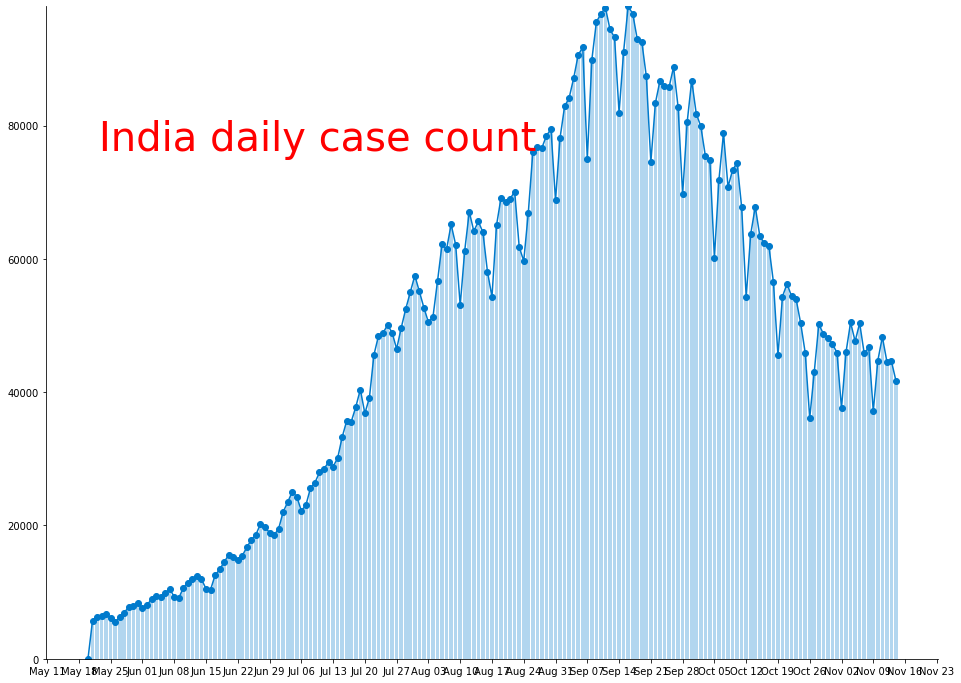

In [22]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

fig,ax1 = plt.subplots(figsize = (16,12))

ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.06, 0.78,'India daily case count', transform = ax1.transAxes,fontsize=40,color='#ff0000');
ax1.set_ylim([min(ef.Total),max(ef.Total)])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

In [23]:
#hide_input
create= """
<!-- #######  HTML!! #########-->
<h1 style="color: #ff004c; text-align: center;">Analysis of top-10 States in covid cases</h1>
"""
html = HTML(create)
display(html)

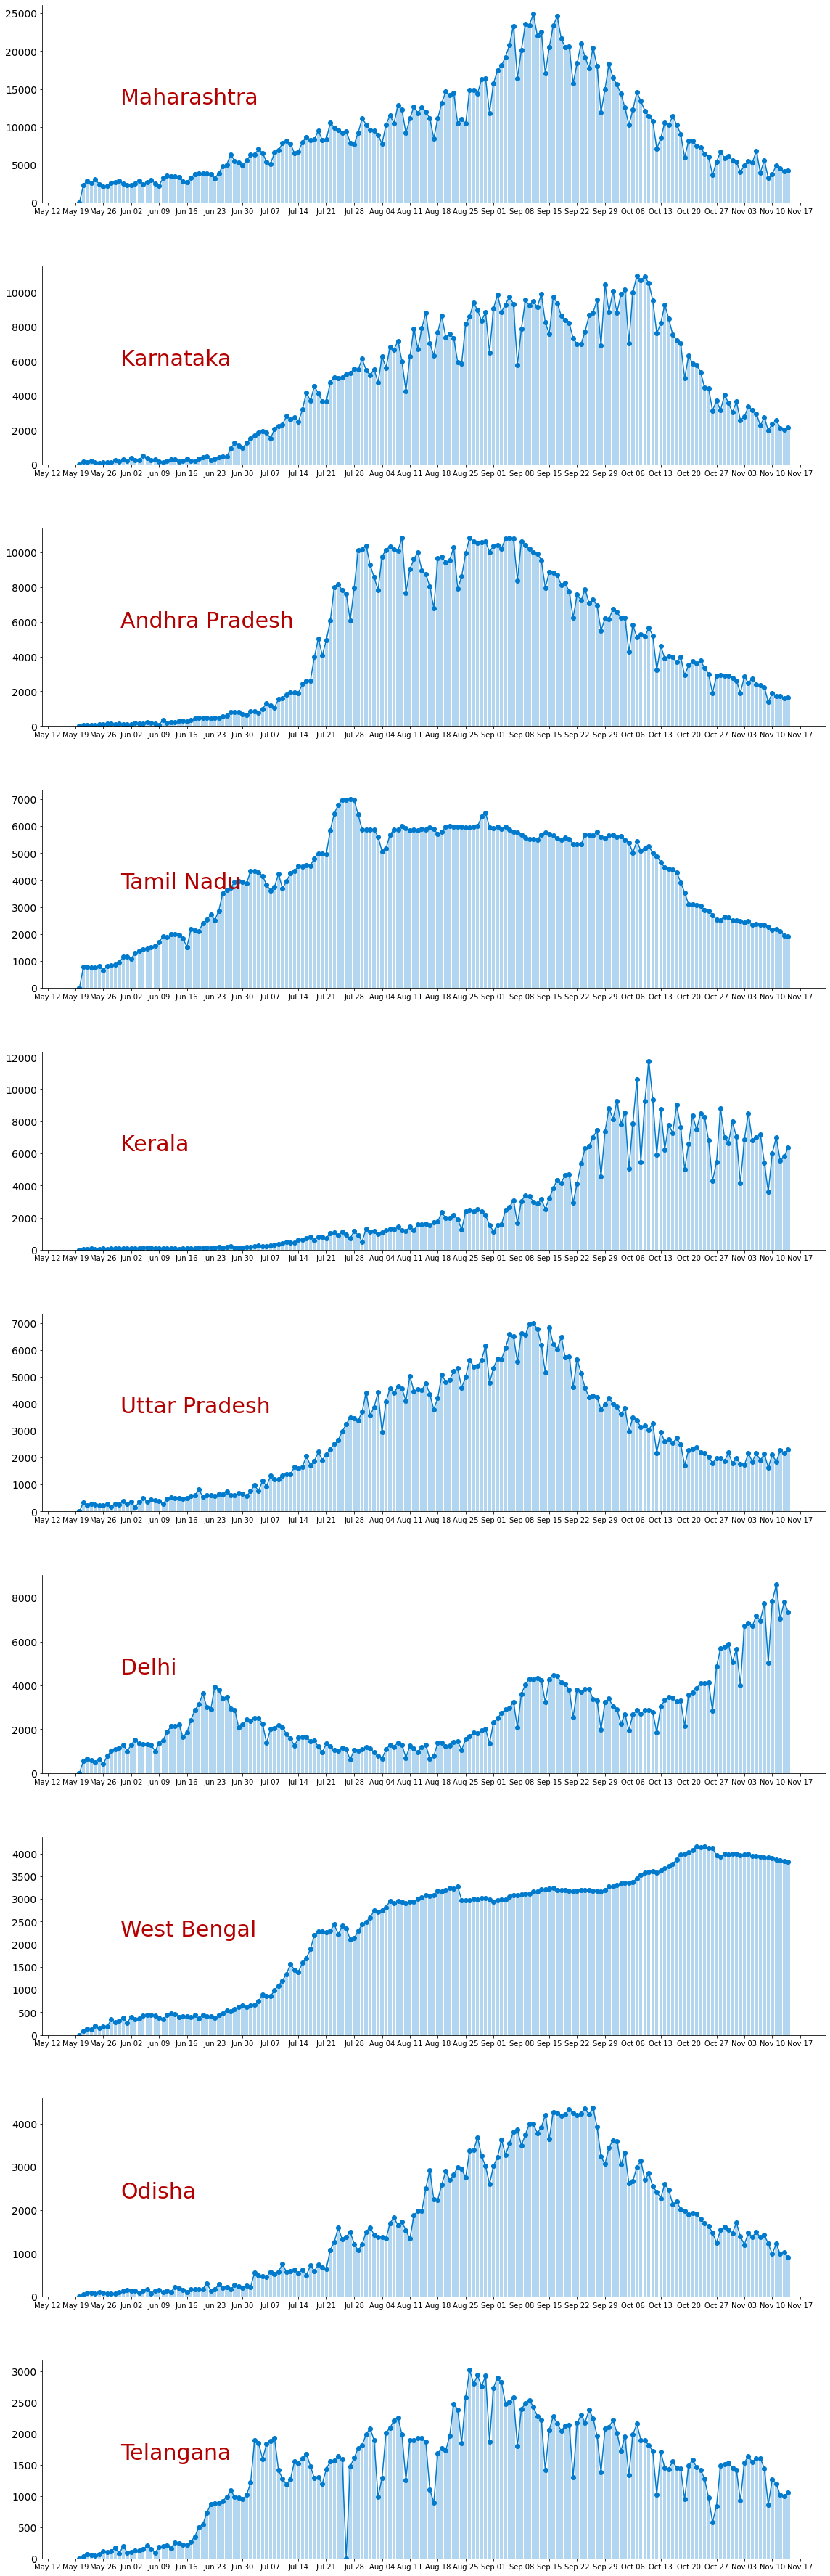

In [24]:
#hide_input
n=10
ax=[]
fig = plt.figure(figsize = (16,50))
gs = fig.add_gridspec(60,40)
arr=df_table.iloc[:10,0].values
count=0
for i in range(len(arr)):
    ax.append(fig.add_subplot(gs[count:count+5,:]))
    ef = df.loc[arr[i]].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date.values,ef.iloc[:,-1].values,color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.1,0.5,f'{arr[i]}',transform = ax[i].transAxes, fontsize = 30,color='#b30000');
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    count+=6
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label1.set_fontsize(10)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)

plt.tight_layout()


In [25]:
#hide_input
fr= df_table['Fatality Rate'].values
ma,mi=max(fr),min(fr)
def max_and_min(df_2,ft):
    for i in range(len(ft)):
        if df_2.iloc[i,-3]==ma:
            state_max=[df_2.iloc[i,0],df_2.iloc[i,-3]]
        elif df_2.iloc[i,-3]==mi:
            state_min=[df_2.iloc[i,0],df_2.iloc[i,-3]]
    return state_max,state_min

x = df_table['Cases (+)'].sum()
y=df_table['Deaths (+)'].sum()
df_table['% Cases (+)']= ((df_table['Cases (+)']/x)*100).round(2)
df_table['% Deaths (+)']=((df_table['Deaths (+)']/y)*100).round(2)
print(df_table.to_string(index=False))

                                   states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate  % Cases (+)  % Deaths (+)
                              Maharashtra  1744698   45914  1740461    45809       4237         105           2.63        10.16         23.33
                                Karnataka   860082   11508   857928    11491       2154          17           1.34         5.17          3.78
                           Andhra Pradesh   852955    6854   851298     6847       1657           7           0.80         3.97          1.56
                               Tamil Nadu   756372   11466   754460    11454       1912          12           1.52         4.59          2.67
                                   Kerala   520418    1849   514061     1823       6357          26           0.36        15.25          5.78
                            Uttar Pradesh   509903    7354   507602     7327       2301          27           1.44         5.52          6.00
      

In [26]:
#hide_input
a,b=max_and_min(df_table,fr)
fatality=f"""
<!-- #######  HTML!! #########-->
<h1 style="color: #ff004c; text-align: center;">{a[0]} has highest Fatality rate ({a[1]})</h1>
<h1 style="color: #ff004c; text-align: center;">{b[0]} has lowest Fatality rate ({b[1]})</h1>"""

html = HTML(fatality)
display(html)